**Question 10**

**An Ad- Agency analyzed a dataset of online ads and used a machine learning
model to predict whether a user would click on an ad or not. 
Dataset - This is the Dataset (https://www.kaggle.com/competitions/avazu-ctr-prediction/data). You can use this dataset for this question.**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
pd.set_option('display.max_columns', None)
from matplotlib import *
import sys
from pylab import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ctrarchive/ad_10000records.csv')

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


## Basic Info : 

In [4]:
df.shape

(10000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [6]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [7]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831,0.491700
std,15.704142,8.572973,13343.708718,40.820951,0.499956
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.860000,29.000000,44052.302500,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.580000,42.000000,61840.260000,212.670000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


In [8]:
from datetime import datetime

In [9]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [10]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [11]:
df['Year'] = df['Timestamp'].apply(lambda x : x.year)

In [12]:
df['Month'] = df['Timestamp'].apply(lambda x : x.month)

In [13]:
df['Hour'] = df['Timestamp'].apply(lambda x : x.hour)

In [14]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Year,Month,Hour
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0,2016,6,21
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0,2016,1,17
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0,2016,6,10
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0,2016,6,14
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1,2016,7,10


In [15]:
type(df['Hour'][0])

numpy.int64

In [16]:
df['Month'] = df['Month'].astype('str')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  10000 non-null  float64       
 1   Age                       10000 non-null  float64       
 2   Area Income               10000 non-null  float64       
 3   Daily Internet Usage      10000 non-null  float64       
 4   Ad Topic Line             10000 non-null  object        
 5   City                      10000 non-null  object        
 6   Gender                    10000 non-null  object        
 7   Country                   10000 non-null  object        
 8   Timestamp                 10000 non-null  datetime64[ns]
 9   Clicked on Ad             10000 non-null  int64         
 10  Year                      10000 non-null  int64         
 11  Month                     10000 non-null  object        
 12  Hour               

**Basic Observations :** 

This dataset has 10000 data with no missing values. The Timestamp feature has been converted to datetime and new features - Hour, Month, Year have been extracted from it. The target column us 'Clicked on Ad'. These new features were extracted to observe these depedencies of target feature as a function of time. This data set has 5 categorical features and the rest are numerical features. 

In [18]:
cat_feature = [item for item in df.columns if df[item].dtypes == 'O']

In [19]:
cat_feature

['Ad Topic Line', 'City', 'Gender', 'Country', 'Month']

In [20]:
num_feature = [item for item in df.columns if df[item].dtypes != 'O']

In [21]:
num_feature

['Daily Time Spent on Site',
 'Age',
 'Area Income',
 'Daily Internet Usage',
 'Timestamp',
 'Clicked on Ad',
 'Year',
 'Hour']

In [22]:
for item in df.columns: 
    print(f'No. of values in {item} : \n {df[item].value_counts()}')

No. of values in Daily Time Spent on Site : 
 55.60    638
41.73    318
82.07    288
80.30    260
56.39    232
        ... 
46.89      1
85.73      1
55.46      1
41.84      1
57.82      1
Name: Daily Time Spent on Site, Length: 460, dtype: int64
No. of values in Age : 
 35.0    516
36.0    490
31.0    485
29.0    483
28.0    469
34.0    440
39.0    423
26.0    383
40.0    382
33.0    373
32.0    368
37.0    360
30.0    339
41.0    320
45.0    317
49.0    313
42.0    291
38.0    283
43.0    276
27.0    262
24.0    257
25.0    237
23.0    227
22.0    212
52.0    198
46.0    197
44.0    195
50.0    176
54.0    151
48.0    150
51.0    137
19.0     99
55.0     63
60.0     48
53.0     45
21.0     22
47.0      7
20.0      5
58.0      1
Name: Age, dtype: int64
No. of values in Area Income : 
 57868.44    312
55424.24    197
52252.91    190
43974.49    177
59785.94    168
           ... 
39939.39      1
37908.29      1
65816.38      1
50439.49      1
43881.73      1
Name: Area Income, Length: 

## Basic EDA :

### Categorical data :

In [23]:
for feat in cat_feature: 
    print(f'{feat} has : {len(df[feat].value_counts())} unique values.')

Ad Topic Line has : 559 unique values.
City has : 521 unique values.
Gender has : 2 unique values.
Country has : 207 unique values.
Month has : 7 unique values.


<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

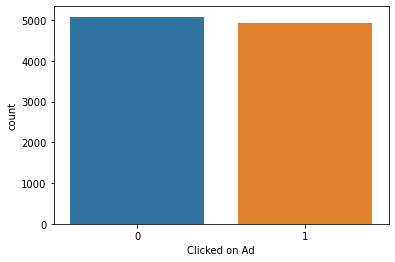

In [24]:
sns.countplot(df['Clicked on Ad'])

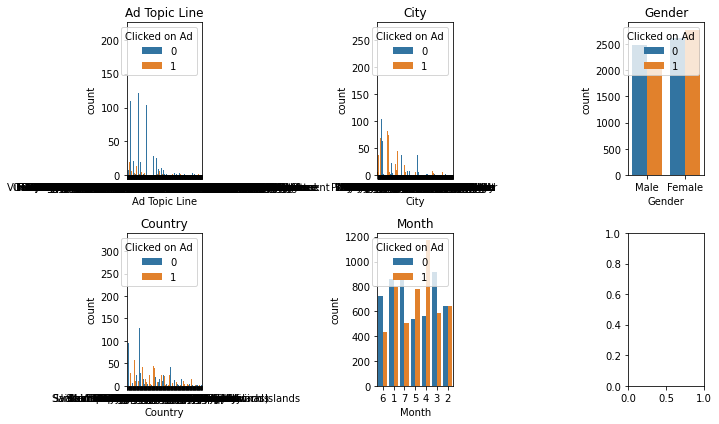

In [25]:
fig, axes = plt.subplots(2,3, figsize=(10,6), tight_layout = True )

si1 = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2]]

for item in range(len(cat_feature)): 
    i = si1[item][0]
    j = si1[item][1]
    sns.countplot(x = df[cat_feature[item]], hue = df['Clicked on Ad'], ax =axes[i,j])
    axes[i,j].set_title(cat_feature[item])
    
plt.show()

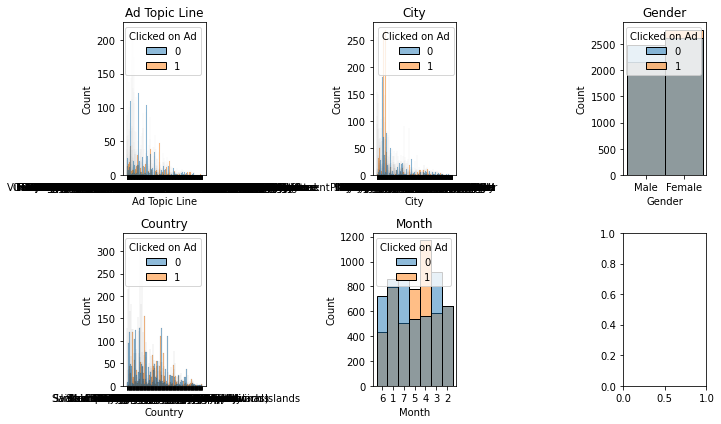

In [26]:
fig, axes = plt.subplots(2,3, figsize=(10,6), tight_layout = True )

si1 = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2]]

for item in range(len(cat_feature)): 
    i = si1[item][0]
    j = si1[item][1]
    sns.histplot(x = df[cat_feature[item]], hue = df['Clicked on Ad'], ax =axes[i,j])
    axes[i,j].set_title(cat_feature[item])
    
plt.show()

**Observations** : 

- There is no particular pattern for Ad Topic Line, City and Country. 

- Gender wise also the distributions are equal. 

- Monthwise the clicking activity is more for the month of May, March and January.
    

### Numerical data :

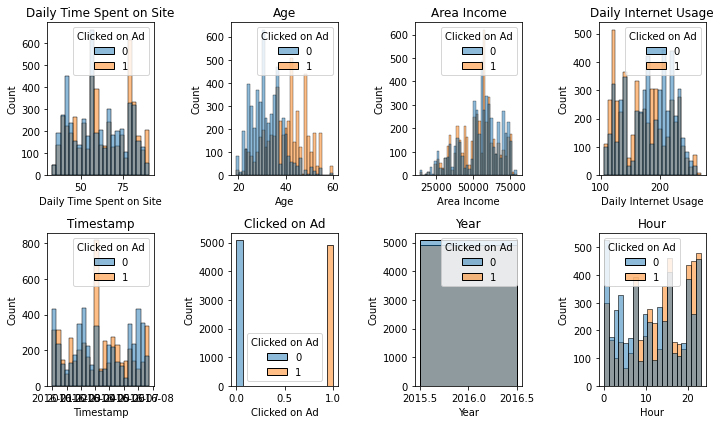

In [27]:
fig, axes = plt.subplots(2,4, figsize=(10,6), tight_layout = True )

si1 = [[0,0], [0,1], [0,2], [0,3], [1,0], [1,1], [1,2], [1,3]]

for item in range(len(num_feature)): 
    i = si1[item][0]
    j = si1[item][1]
    sns.histplot(x = df[num_feature[item]], hue = df['Clicked on Ad'], ax =axes[i,j])
    axes[i,j].set_title(num_feature[item])
    
plt.show()

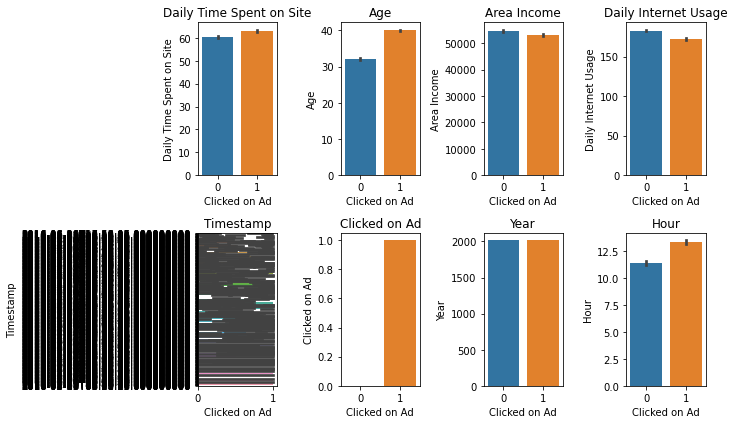

In [28]:
fig, axes = plt.subplots(2,4, figsize=(10,6), tight_layout = True )

si1 = [[0,0], [0,1], [0,2], [0,3], [1,0], [1,1], [1,2], [1,3]]

for item in range(len(num_feature)): 
    i = si1[item][0]
    j = si1[item][1]
    sns.barplot(y = df[num_feature[item]], x = df['Clicked on Ad'], ax =axes[i,j])
    axes[i,j].set_title(num_feature[item])
    
plt.show()

**Observations :**

- The distribution for Clicked on Ad has no dependencies on the numerical features. 





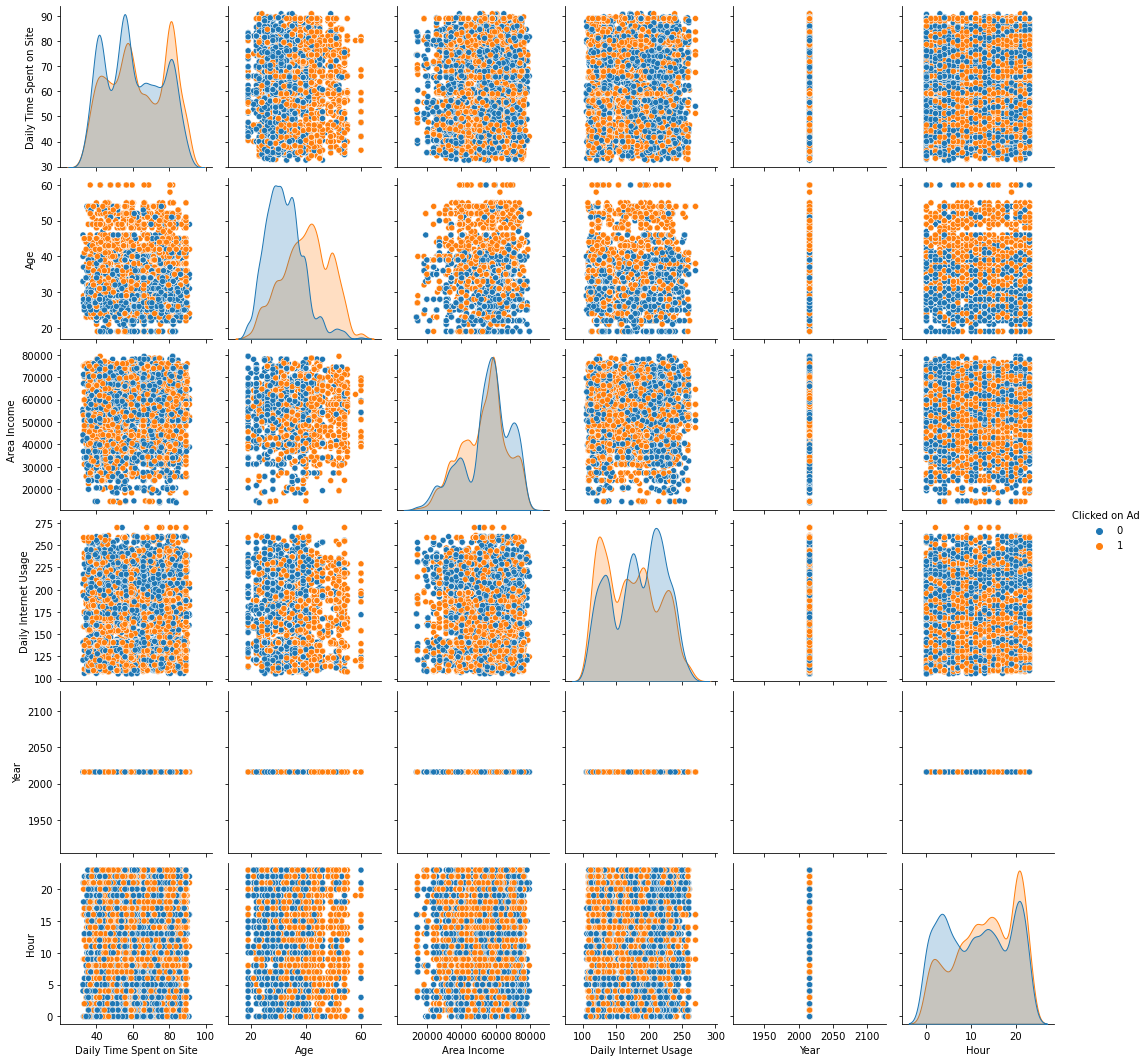

In [29]:
sns.pairplot(data = df, hue = 'Clicked on Ad')

## Model

To build the model, we want to :

- Impute missing values (In this data set we do not have any missing values).
- Feature scaling of numerical features.
- Encoding and feature scaling categorical variables.
- Train Test splitting
- Fitting and transforming of training data. Transforming of test data.
- Fitting the model to the clean, scaled and transformed data.
- Evaluation of model.
- Finding the best parameters for the best model.



In [30]:
df1 = df.copy()

In [31]:
df1 = df1[['Daily Time Spent on Site', 'Age', 'Area Income', 
           'Daily Internet Usage', 'Ad Topic Line', 'City', 
           'Gender', 'Country', 'Year', 'Month', 'Hour' ,'Clicked on Ad']]

In [32]:
df1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Year,Month,Hour,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016,6,21,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016,1,17,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016,6,10,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016,6,14,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016,7,10,1


In [33]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
df1.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Year', 'Month', 'Hour', 'Clicked on Ad'],
      dtype='object')

In [37]:
X = df1.drop(labels = 'Clicked on Ad', axis = 1)
y = df1['Clicked on Ad']

In [38]:
print(f'X Shape : {X.shape}, \n y Shape : {y.shape}')

X Shape : (10000, 11), 
 y Shape : (10000,)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [40]:
print(f'X_train Shape : {X_train.shape},  y_train Shape : {y_train.shape}, \n X_test Shape : {X_test.shape},  y_test Shape : {y_test.shape}')

X_train Shape : (7000, 11),  y_train Shape : (7000,), 
 X_test Shape : (3000, 11),  y_test Shape : (3000,)


In [41]:
num_feature = ['Daily Time Spent on Site', 'Age', 'Area Income',
               'Daily Internet Usage', 'Year', 'Hour']

In [42]:
#pipeline 

num_pipeline = Pipeline(steps = [('imputer', SimpleImputer(strategy='median')), 
                                 ('scaler', StandardScaler())
                                 ])
    

cat_pipeline = Pipeline(steps= [('imputer', SimpleImputer(strategy='most_frequent')), 
                                ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False)), 
                                ('scaler',StandardScaler())
                                ])
        
# preprocessor 

preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_feature), 
    ('cat_pipeline', cat_pipeline, cat_feature)
])

In [43]:
X_train_scaled = pd.DataFrame(preprocessor.fit_transform(X_train))
X_test_scaled = pd.DataFrame(preprocessor.transform(X_test))

In [44]:
def evaluate_model(true, predicted):
    acc_score = accuracy_score(true, predicted)
    pre_score = precision_score(true, predicted)
    rec_score = recall_score(true, predicted)
    f_score = f1_score(true, predicted)
    return acc_score, pre_score, rec_score, f_score

In [45]:
models={
    'KNN':KNeighborsClassifier(),
    'SVM':SVC(probability=True),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier()
}
trained_model_list=[]
model_list=[]
proba_list = []

for i in range(len(list(models))):
    model=list(models.values())[i]
    
    model.fit(X_train_scaled, y_train)

    #Make Predictions
    y_pred=model.predict(X_test_scaled)
    proba_list.append(model.predict_proba(X_test_scaled)[:, 1]) # for output 1
    
    acc_score, pre_score, rec_score, f_score = evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    
    print('Model Training Performance')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test,y_pred))
    
    
    print("Accuracy :",np.round(acc_score, 3))
    print("Precision :", np.round(pre_score, 3))
    print("Recall  :", np.round(rec_score, 3))
    print("F1  :", np.round(f_score, 3))
    
    print('='*35)
    print('\n')

KNN
Model Training Performance
[[1274  269]
 [ 233 1224]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1543
           1       0.82      0.84      0.83      1457

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000

Accuracy : 0.833
Precision : 0.82
Recall  : 0.84
F1  : 0.83


SVM
Model Training Performance
[[1322  221]
 [ 221 1236]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1543
           1       0.85      0.85      0.85      1457

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000

Accuracy : 0.853
Precision : 0.848
Recall  : 0.848
F1  : 0.848


DecisionTree
Model Training Performance
[[1257  286]
 [ 235 1222]]
              precision    recall  f

## ROC curve and AUC score 

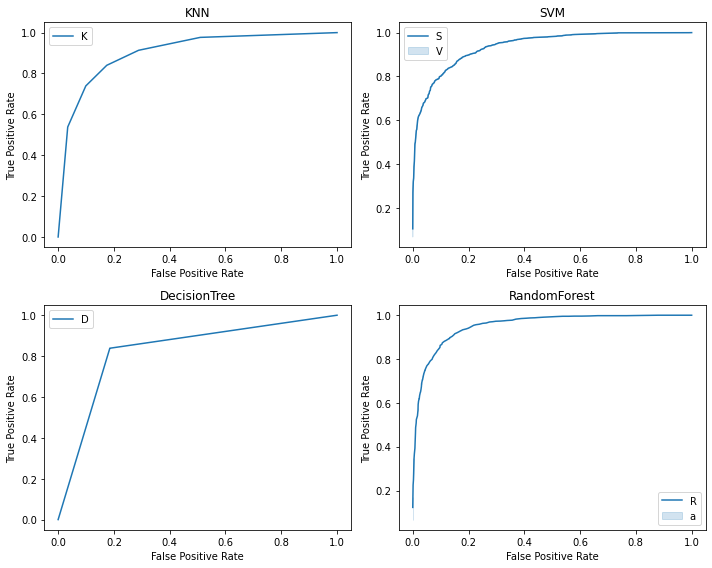

In [46]:
fig, axes = plt.subplots(2,2, figsize=(10,8), tight_layout = True)
si1 = [[0,0], [0,1], [1,0], [1,1]]



for i in range(len(model_list)) : 
    rf_fpr, rf_tpr, threshold = roc_curve(y_test, proba_list[i], pos_label=1)
    #print(rf_fpr)
    #print(rf_tpr)
    #print(threshold)
    j = si1[i][0]
    k = si1[i][1]
    sns.lineplot(rf_fpr, rf_tpr, ax = axes[j,k], legend=True)
    axes[j,k].set_title(model_list[i])
    axes[j,k].set_xlabel('False Positive Rate')
    axes[j,k].set_ylabel('True Positive Rate')
    axes[j,k].legend(model_list[i])

plt.show()

In [47]:
proba_list

[array([0. , 0. , 1. , ..., 0.6, 1. , 0. ]),
 array([0.07283645, 0.01992504, 0.98768306, ..., 0.82965969, 0.98867328,
        0.09026163]),
 array([0., 0., 1., ..., 1., 1., 0.]),
 array([0.17 , 0.13 , 1.   , ..., 0.61 , 0.925, 0.19 ])]

In [48]:
def get_auc(y_test, listprobpred) : 
    """
    This function takes y_test and list of probabilities as input and returns the roc-auc score.
    """
    auc_vals = list()

    for i in range(len(proba_list)) : 
        auc_vals.append(roc_auc_score(y_test, proba_list[i]))
        
        
    df_auc = pd.DataFrame(auc_vals, index = model_list)
        
    return df_auc


auc_scores = get_auc(y_test, proba_list)
auc_scores

,0
KNN,0.903748
SVM,0.937646
DecisionTree,0.826574
RandomForest,0.953005


**Comments**

- The distribution of the two classes in target features have no particular distribution pattern as can be seen from the pairplot. So, we decide to go by the KNN, SVM and ensemble learning. 

- All of the models/algorithms work very well, resulting in accuracy more than 80%. 

- Among them Random forest performs best. This can be also observed from the ROC curve and AUC score. 

- One thing to be noted that in this project we have used scaled data for Random Forest and Decision Tree. Though we know that we need not perform feature scaling for these algorithms. But one may also check that feature scaling does no harm to the model performance. There are several blogs about it. One of them is this. https://towardsdatascience.com/how-data-normalization-affects-your-random-forest-algorithm-fbc6753b4ddf. One is encouraged to go through this.



### Hyper Parameter Tuning using Grid Search : 

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
          
    {'classifier' : [RandomForestClassifier()],
     'classifier__criterion' : ['gini', 'entropy', 'log_loss'],
     'classifier__n_estimators' : list(range(10,101,10)),
     'classifier__max_features' : list(range(6,32,5))},
    
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs= 2)

# Fit on data

best_clf = clf.fit(X_train_scaled, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",best_clf.best_estimator_)
print("\n The best score across ALL searched params:\n",best_clf.best_score_)
print("\n The best parameters across ALL searched params:\n",best_clf.best_params_)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 Pipeline(steps=[('classifier',
                 RandomForestClassifier(criterion='entropy', max_features=6))])

 The best score across ALL searched params:
 0.8827142857142858

 The best parameters across ALL searched params:
 {'classifier': RandomForestClassifier(criterion='entropy', max_features=6), 'classifier__criterion': 'entropy', 'classifier__max_features': 6, 'classifier__n_estimators': 100}
